[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ajoshiusc/lesion-detector/blob/master/main_anatomy_map.ipynb)

In [0]:
!rm -rf ./lesion-detector

!git clone https://github.com/ajoshiusc/lesion-detector
!pip install nilearn
import nilearn.image
import sys
import numpy as np

sys.path.insert(0, './lesion-detector/src/SpyderNet')
  
import numpy as np
from spydernet import train_model, mod_indep_rep
from datautils import read_data
import matplotlib.pyplot as plt
from google.colab import drive

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

""" Main script that calls the functions objects"""
print('gdrive mounting')
drive.mount('/content/gdrive')
print('mounted')
""" Main script that calls the functions objects"""
data_dir = 'gdrive/My Drive/tracktbi_pilot'


data = read_data(
study_dir=data_dir, nsub=10, psize=[128, 128], npatch_perslice=64)

np.savez('gdrive/My Drive/tp_data.npz', data=data)

train_data = data #[0:-5, :, :, :]

model = train_model(train_data)

model.save('gdrive/My Drive/tp_model_softmax.h5')

test_data = data[90:95, :, :, :]

model.load_model('gdrive/My Drive/tp_model.h5') 


I, pred = mod_indep_rep(model, test_data)

plt.figure()
for j in range(5):
  plt.subplot(3, 5, j + 1)
  plt.imshow(I[j, :, :, :].squeeze(), cmap='gray')
  plt.subplot(3, 5, 5 + j + 1)
  plt.imshow(test_data[j, :, :, 0].squeeze(), cmap='gray')
  plt.subplot(3, 5, 10 + j + 1)
  plt.imshow(pred[0][j, :, :, 0].squeeze(), cmap='gray')

plt.show()

print(test_data)
print(I)

#for j in range(5):
#plt.matshow(I[j,:,:,:].squeeze())

#plt.show()



Cloning into 'lesion-detector'...
remote: Enumerating objects: 151, done.
remote: Counting objects: 100% (151/151), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 405 (delta 99), reused 83 (delta 47), pack-reused 254
Receiving objects: 100% (405/405), 18.98 MiB | 19.42 MiB/s, done.
Resolving deltas: 100% (251/251), done.
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3616747095268602928
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11281553818
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13697430032388356641
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]
gdrive mounting
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
mounted
subject 1 


In [2]:
!rm -rf ./lesion-detector

!git clone https://github.com/ajoshiusc/lesion-detector
!pip install nilearn
import nilearn.image
import sys
import numpy as np

sys.path.insert(0, './lesion-detector/src/SpyderNet')
  
from google.colab import drive
from spydernet import train_model, mod_indep_rep

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

""" Main script that calls the functions objects"""
print('gdrive mounting')
drive.mount('/content/gdrive')
print('mounted')

from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

model = load_model('gdrive/My Drive/tp_model_softmax.h5') 
  
d=np.load('gdrive/My Drive/tp_data.npz')

data=d['data']
test_data = data[190:195, :, :, :]


Cloning into 'lesion-detector'...
remote: Enumerating objects: 151, done.
remote: Counting objects: 100% (151/151), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 405 (delta 99), reused 83 (delta 47), pack-reused 254
Receiving objects: 100% (405/405), 18.98 MiB | 18.83 MiB/s, done.
Resolving deltas: 100% (251/251), done.
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17920396268149289417
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11281553818
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10187834491844944013
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]
gdrive mounting
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
mounted


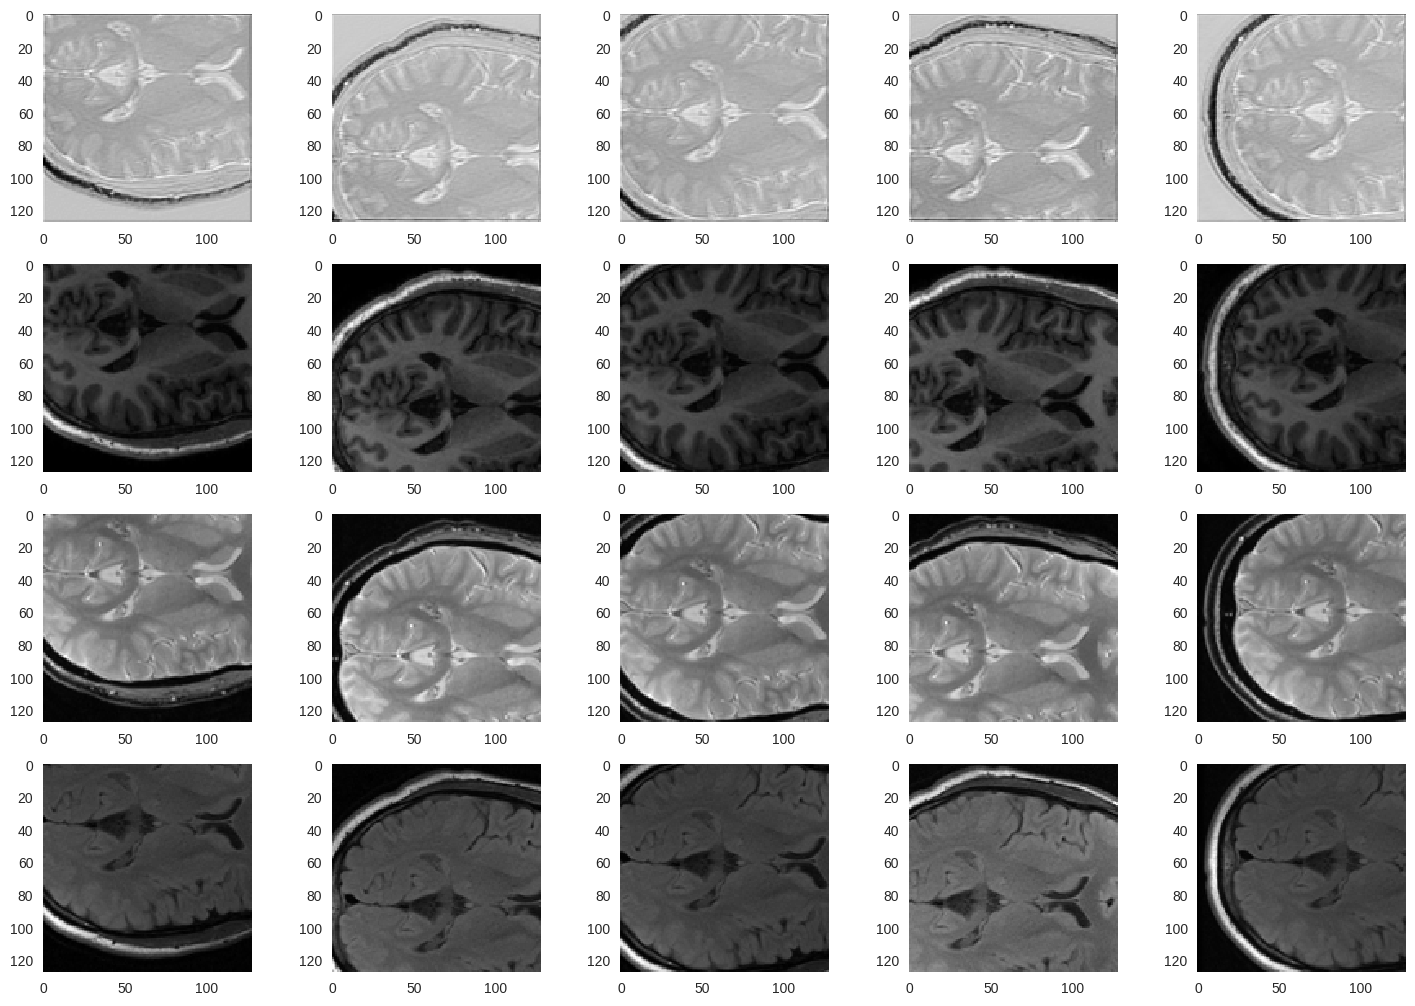

(182, 218, 182, 3)


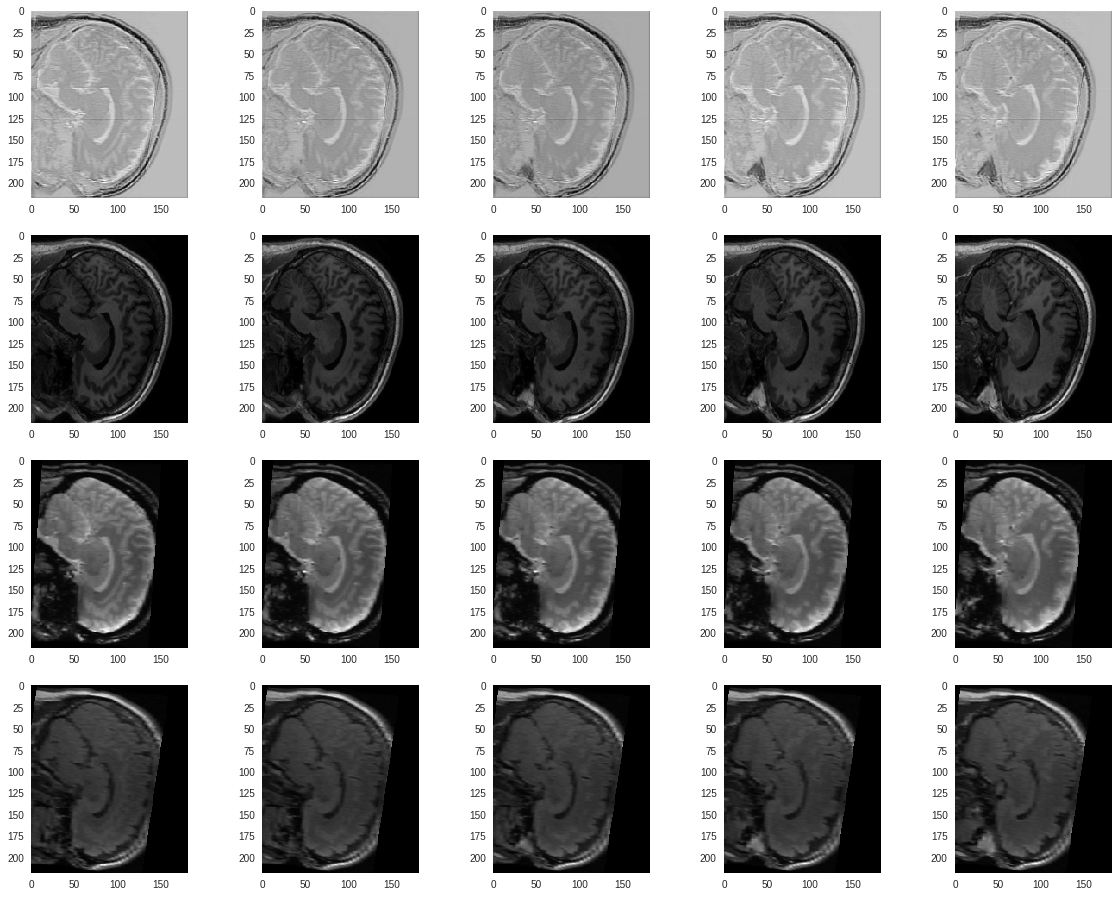

(182, 218, 182, 3)


In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
from spydernet import train_model, mod_indep_rep_vol, mod_indep_rep_vol
plt.rcParams["axes.grid"] = False
test_data = data[5000:5005, :, :, :]

fig=plt.figure(figsize=(18, 16), dpi= 100, facecolor='none', edgecolor='none')

td=test_data.copy()

I = mod_indep_rep_vol(model, td, 128)

I.shape
#fig=plt.figure(figsize=(20, 20))
pred = test_data

for j in range(5):
  plt.subplot(5, 5, j + 1)
  plt.imshow(I[j, :, :,0], cmap='gray')

  plt.subplot(5, 5, 5 + j + 1)
  plt.imshow(test_data[j, :, :, 0].squeeze(), cmap='gray')
  
  plt.subplot(5, 5, 10 + j + 1)
  plt.imshow(test_data[j, :, :, 1].squeeze(), cmap='gray')

  plt.subplot(5, 5, 15 + j + 1)
  plt.imshow(test_data[j, :, :, 2].squeeze(), cmap='gray')
  
  
plt.show()


import nilearn.image as ni

t1=ni.load_img('/content/gdrive/My Drive/tracktbi_pilot/TBI_INVBB041DZW/T1.nii.gz').get_data()
t2=ni.load_img('/content/gdrive/My Drive/tracktbi_pilot/TBI_INVBB041DZW/T2.nii.gz').get_data()
flair=ni.load_img('/content/gdrive/My Drive/tracktbi_pilot/TBI_INVBB041DZW/FLAIR.nii.gz').get_data()
t1o=ni.load_img('/content/gdrive/My Drive/tracktbi_pilot/TBI_INVBB041DZW/T1.nii.gz')


p = np.percentile(np.ravel(t1), 95)  #normalize to 95 percentile
t1 = np.float32(t1) / p

p = np.percentile(np.ravel(t2), 95)  #normalize to 95 percentile
t2 = np.float32(t2) / p

p = np.percentile(np.ravel(flair), 95)  #normalize to 95 percentile
flair = np.float32(flair) / p

dat = np.stack((t1, t2, flair), axis=3)

#dat=np.stack((t1.get_data(),t2.get_data(),flair.get_data()),axis=-1)

print(dat.shape)
dat=np.float32(dat)
td=dat.copy()
I2 = mod_indep_rep_vol(model, td, 128)

fig=plt.figure(figsize=(20, 20))
for j in range(5):
  plt.subplot(5, 5, j + 1)
  plt.imshow(I2[j+100, :, :,0], cmap='gray')

  plt.subplot(5, 5, 5 + j + 1)
  plt.imshow(dat[j+100, :, :, 0].squeeze(), cmap='gray')
  
  plt.subplot(5, 5, 10 + j + 1)
  plt.imshow(dat[j+100, :, :, 1].squeeze(), cmap='gray')

  plt.subplot(5, 5, 15 + j + 1)
  plt.imshow(dat[j+100, :, :, 2].squeeze(), cmap='gray')
  
  
plt.show()


print(I2.shape)

img=ni.new_img_like(t1o, I2[:,:,:,0])
img.to_filename('/content/gdrive/My Drive/tracktbi_pilot/out.nii.gz')





In [8]:
I[1].shape

AttributeError: ignored